In [ ]:
!pip install scikit-learn==0.23.1

  Using cached scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


## libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns # for data visualiztions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

## data set

In [ ]:
df = pd.read_csv('sensors.csv')
# df = pd.read_csv('full_data_carla.csv')
df.head()

,Class,GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,1,-0.923664,3.694656,0.824427,0.162598,-0.086670,-0.969482
1,1,-0.908397,4.534351,0.832061,0.175781,-0.100586,-1.013184
2,1,0.786260,3.969466,0.587786,0.322754,-0.140381,-0.911621
3,1,0.335878,4.564885,-0.251908,0.480225,-0.226807,-0.936768
4,1,3.351145,2.694656,-0.106870,0.426025,-0.253906,-0.950195


In [ ]:
df.shape

(1114, 7)

In [ ]:
df['Class'].value_counts()

3    350
2    288
1    252
4    224
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

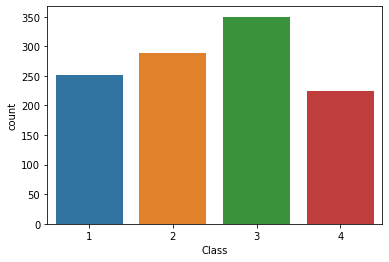

In [ ]:
sns.countplot(x="Class", data = df)

In [ ]:
data =  df[['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']]
yy=df['Class']
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,yy], axis=1)
data = pd.melt(data, id_vars = 'Class', var_name = 'features',value_name = 'value')
data

,Class,features,value
0,1,GyroX,-0.003380
1,1,GyroX,-0.002829
2,1,GyroX,0.058294
3,1,GyroX,0.042050
4,1,GyroX,0.150805
...,...,...,...
6679,4,AccZ,0.120377
6680,4,AccZ,0.017751
6681,4,AccZ,-0.021370
6682,4,AccZ,-0.043878


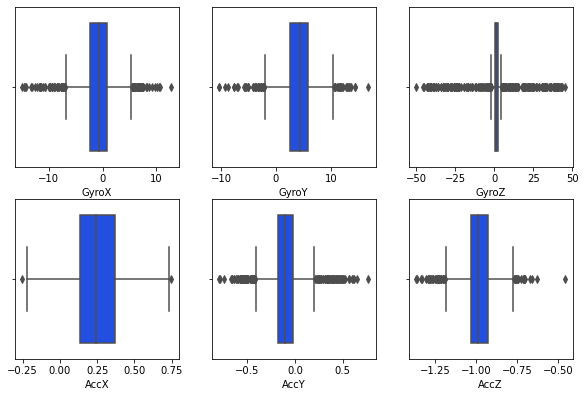

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
columns = list(df.select_dtypes(include="float64").columns)
for i, c in enumerate(columns, 1):
    plt.subplot(3,3,i)
    plot=sns.boxplot(x=c, palette="bright", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points

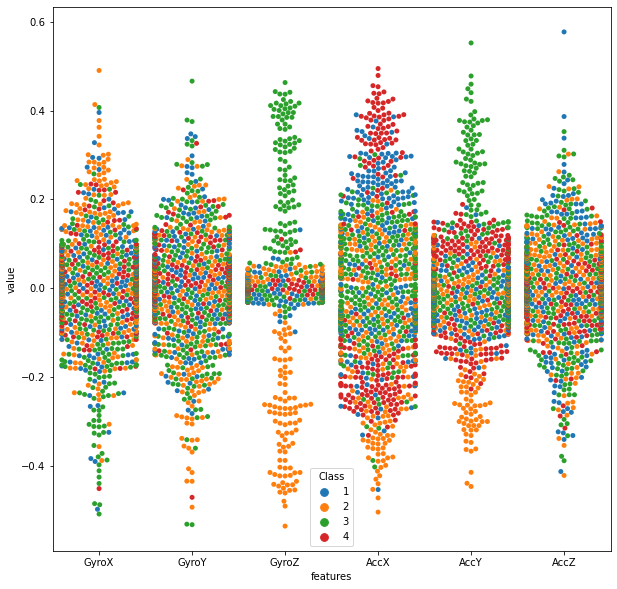

In [ ]:
# swarmplot for analysing the different attributes
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'Class', data = data)
plt.show()

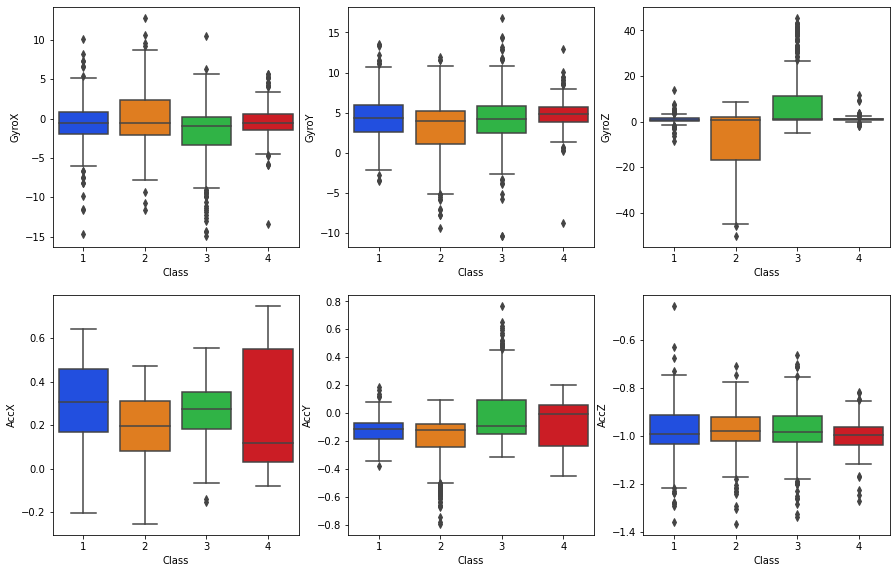

In [ ]:
%matplotlib inline

plt.figure(figsize=(15,15))
columns = list(df.select_dtypes(include="float64").columns)
for i, c in enumerate(columns, 1):
    plt.subplot(3,3,i)
    plot=sns.boxplot(x="Class", y=c, palette="bright", data=df)

In [ ]:
classes = [1,3,4]
columns =['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY']
# outliers = {'sepal length' : [],'sepal width':[],'petal width':[],'petal length':[]}
for col in columns :
    pl= df[['Class', col]]
    for class1 in classes :
        if( (col == 'AccX' and (class1 == 3)) or  (col == 'Accy' and (class1 == 1))
          or (col == 'GyroZ' and ( class1 == 4)) or (col =='GyroX' and ( class1 == 1 or class1==4))
          or (col == 'GyroY'  and class1 == 4)) :
            plc=pl.loc[df['Class'] == class1]
            listt=plc[col]
    #         print(listt.mean())

            Q1 = np.percentile(listt, 25, interpolation = 'midpoint')
            Q2 = np.percentile(listt, 50, interpolation = 'midpoint')
            Q3 = np.percentile(listt , 75, interpolation = 'midpoint')
            IQR = Q3 - Q1

            outlier=[x for x in listt if x> 1.5*IQR + Q3]
            outlier+=[x for x in listt if x< Q1 - 1.5*IQR ]
            print( class1, col)
            print("Q1 , Q2 , Q3 , IQR : ",Q1 , Q2 , Q3 , IQR )
#             print("min , max :" , min(listt) , max(listt))
            print("outlier data :" ,outlier, "\n\n")

            for out in outlier :
                tf = np.logical_and((df['Class'] == class1), (df[col]==out))
    #             print(tf)
                df.loc[tf, col] = listt.mean()



1 GyroX
Q1 , Q2 , Q3 , IQR :  -2.030534351 -0.618320611 0.8969465645 2.9274809155
outlier data : [10.15267176, 6.732824427, 7.290076336, 5.351145038, 6.58778626, 7.34351145, 8.267175573, -7.374045802, -8.167938931, -11.66412214, -6.709923664, -7.541984733, -11.48091603, -9.839694656, -14.64885496, -6.641221374, -8.221374046] 


4 GyroX
Q1 , Q2 , Q3 , IQR :  -1.4694656485 -0.561068702 0.6145038165 2.083969465
outlier data : [5.160305344, 4.503816794, 5.160305344, 5.290076336, 4.06870229, 5.679389313, 5.312977099, 4.114503817, 4.641221374, 5.633587786, 4.305343511, -13.35877863, -4.702290076, -5.877862595, -5.847328244, -5.717557252, -4.694656489] 


4 GyroY
Q1 , Q2 , Q3 , IQR :  3.8358778625 4.847328244 5.6679389315 1.8320610690000003
outlier data : [10.13740458, 9.091603053, 9.122137405, 8.465648855, 12.98473282, 8.580152672, 9.480916031, 8.65648855, 8.770992366, 9.442748092, 0.351145038, -8.679389313, 0.671755725, 0.290076336, 0.702290076] 


4 GyroZ
Q1 , Q2 , Q3 , IQR :  0.667938931 

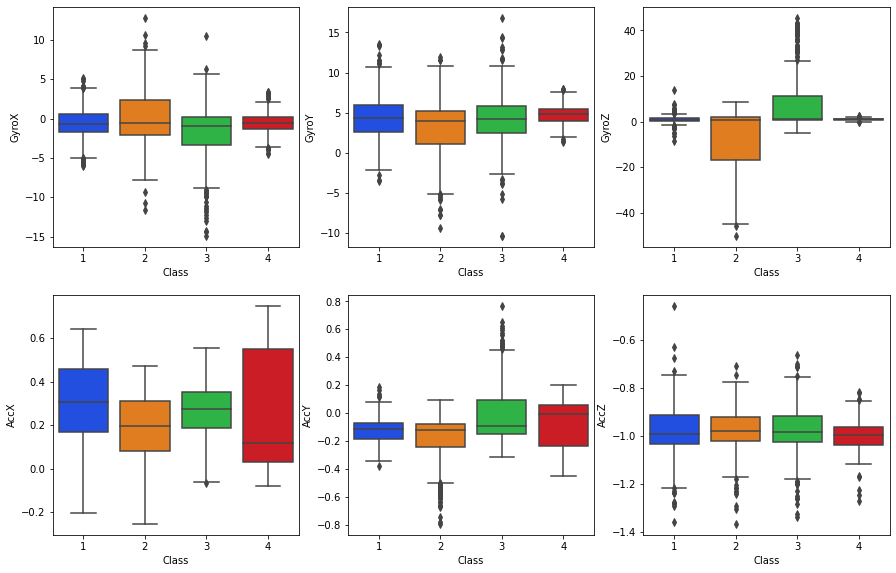

In [ ]:
%matplotlib inline

plt.figure(figsize=(15,15))
columns = list(df.select_dtypes(include="float64").columns)
for i, c in enumerate(columns, 1):
    plt.subplot(3,3,i)
    plot=sns.boxplot(x="Class", y=c, palette="bright", data=df)

<AxesSubplot:>

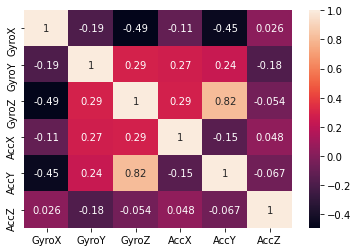

In [ ]:
sns.heatmap(df[['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']].corr(), annot=True)

In [ ]:
df.columns

Index(['Class', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'], dtype='object')

In [ ]:

x, y = df.drop(['Class'], axis=1).values, df['Class'].values
x,y

(array([[-0.92366412,  3.69465649,  0.82442748,  0.16259766, -0.08666992,
         -0.96948242],
        [-0.90839695,  4.53435114,  0.83206107,  0.17578125, -0.10058594,
         -1.01318359],
        [ 0.78625954,  3.96946565,  0.58778626,  0.32275391, -0.14038086,
         -0.91162109],
        ...,
        [-1.0610687 ,  4.53435114,  1.18320611,  0.41918945, -0.19287109,
         -1.00268555],
        [-1.01526718,  5.25954199,  0.65648855,  0.30883789, -0.09008789,
         -1.02319336],
        [-0.87786259,  4.48854962,  0.04580153,  0.09814453, -0.01586914,
         -1.0012207 ]]),
 array([1, 1, 1, ..., 4, 4, 4], dtype=int64))

## preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(x)

x = scaler.transform(x.astype(float))
x[0:5]

array([[-0.03170665, -0.13015507, -0.01861359, -0.49672404,  0.04434692,
         0.14009952],
       [-0.02685281,  0.13389953, -0.01797916, -0.42440636, -0.02877161,
        -0.3057532 ],
       [ 0.51192402, -0.0437372 , -0.03828114,  0.38180183, -0.23786493,
         0.73041848],
       [ 0.36873558,  0.14350152, -0.10806921,  1.24559632, -0.69196946,
         0.47386636],
       [ 1.32737003, -0.4446201 , -0.09601491,  0.94829031, -0.83435816,
         0.33687251]])

## train test split

In [ ]:
train_ratio = 0.70
test_ratio = 0.30
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=test_ratio, random_state=3, stratify= y )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (779, 6) (779,)
Test set: (335, 6) (335,)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print (np.asarray((unique, counts)).T)



[[  1 176]
 [  2 201]
 [  3 245]
 [  4 157]]


## checking knn with diffrents parameters

In [ ]:

accuracies = []
cross_validation_fold = 10
ks = range(1,40)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k , weights = 'distance',metric="euclidean")
    scores = cross_val_score(knn, X_train, y_train, cv=cross_validation_fold)
    accuracies.append(scores.mean())
print(accuracies)
print(max(accuracies))

[0.5699467199467199, 0.5699467199467199, 0.5763569763569762, 0.5982184482184483, 0.5994838494838495, 0.6123376623376624, 0.6058941058941059, 0.6225607725607725, 0.6225774225774225, 0.6252081252081252, 0.6278055278055278, 0.6278221778221778, 0.6265068265068264, 0.6278055278055278, 0.614951714951715, 0.6226606726606726, 0.6175324675324675, 0.62004662004662, 0.6161838161838162, 0.6174991674991676, 0.6123376623376624, 0.6187479187479188, 0.6226107226107226, 0.6123543123543124, 0.6175158175158175, 0.6213453213453214, 0.6175324675324675, 0.6098068598068599, 0.614935064935065, 0.6316183816183816, 0.6213619713619714, 0.6213453213453214, 0.6213453213453214, 0.6123543123543124, 0.6187479187479188, 0.6123543123543124, 0.611038961038961, 0.62004662004662, 0.6162004662004662]
0.6316183816183816


Text(0.5, 1.0, ' weight = distance and metric = euclidean ')

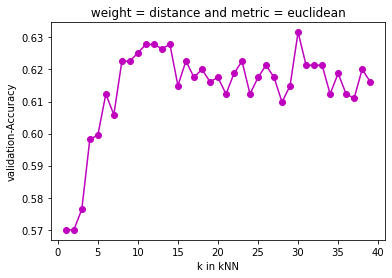

In [ ]:
fig2 = plt.figure()
plt.plot(ks, accuracies,'m-o')
plt.xlabel('k in kNN')
plt.ylabel('validation-Accuracy')
plt.title(' weight = distance and metric = euclidean ')

In [ ]:
#پارامتر هایی که داره و تعریف کن همین
accuracies = []
cross_validation_fold = 10
ks = range(1,40)
for k in ks:
    # instantiate kNN with given neighbor size k
#     metric='euclidean', n_neighbors= 11, weights= 'uniform'
    knn = KNeighborsClassifier(metric='manhattan', n_neighbors= k, weights= 'uniform')
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X_train, y_train, cv=cross_validation_fold)
    accuracies.append(scores.mean())
print(accuracies)
print(max(accuracies))

[0.5763236763236763, 0.5647852147852148, 0.5854811854811854, 0.6020646020646021, 0.6058608058608058, 0.6007659007659008, 0.6161338661338661, 0.6212953712953713, 0.6251748251748251, 0.629037629037629, 0.6316017316017316, 0.6264402264402265, 0.6264901764901765, 0.6201132201132201, 0.6303529803529803, 0.6303529803529803, 0.6355144855144854, 0.6278055278055278, 0.6265234765234765, 0.6354811854811854, 0.6328837828837829, 0.629054279054279, 0.6187645687645688, 0.6175158175158175, 0.614951714951715, 0.6213952713952714, 0.6213952713952714, 0.6162670662670663, 0.6162504162504162, 0.6136696636696637, 0.6162337662337662, 0.6110722610722611, 0.6033799533799534, 0.6085248085248084, 0.6008158508158508, 0.605944055944056, 0.6072427572427573, 0.605977355977356, 0.6021145521145522]
0.6355144855144854


Text(0.5, 1.0, ' weight = manhatan and metric = uniform ')

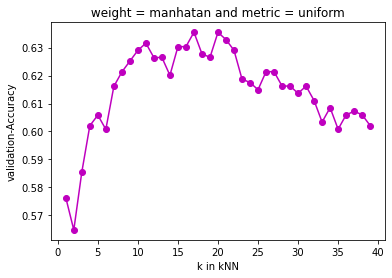

In [ ]:
fig2 = plt.figure()
plt.plot(ks, accuracies,'m-o')
plt.xlabel('k in kNN')
plt.ylabel('validation-Accuracy')
plt.title(' weight = manhatan and metric = uniform ')

In [ ]:
#grid
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6559796-tune-your-hyperparameters
#https://www.kaggle.com/arunimsamudra/k-nn-with-hyperparameter-tuning
# distance metric : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric


In [ ]:
knn = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=10)
ks = [1,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
weights =  ['uniform']
metrics =  ['euclidean','manhattan']
hyperprameter_candidates = [{'n_neighbors': ks, 'weights': weights , 'metric' : metrics}]


In [ ]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hyperprameter_candidates, cv=skfold)
g_res = grid.fit(X_train, y_train)

In [ ]:
print( "best accuracy :" , g_res.best_score_)
print("best prameter :" , g_res.best_params_)
#mitooni neighbour ha ro ta bishtar koni ba nemoodar neshoon bedi


best accuracy : 0.6355144855144854
best prameter : {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, g_res.predict(X_train)))

Train set Accuracy:  0.6893453145057766


In [ ]:
#پارامتر هایی که داره و تعریف کن همین
accuracies = []
acc_train = []
cross_validation_fold = 10
ks = range(1,30)
for k in ks:

    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k , weights = 'distance',metric="euclidean")

    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_validate(knn, X_train, y_train, cv=cross_validation_fold , return_train_score=True , )

    accuracies.append(scores['test_score'].mean())
    acc_train.append(scores['train_score'].mean())
# print(accuracies)
# print(acc_train)
# print(max(accuracies))


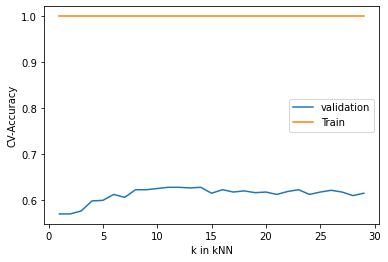

In [ ]:
fig2 = plt.figure()
plt.plot(ks, accuracies, label ="validation")
plt.plot(ks, acc_train, label='Train')
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
plt.legend()

In [ ]:
# اوکی پس میگی که با دیستنس شاید خیلی دقیق میشه پس با uniform میریم جلو .

In [ ]:
#.fit -> data hat moshakhas mishe hame chizeshoon ke chia hastn o in a'

In [ ]:
#https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d
# cross validation explanation link

In [ ]:
#https://vitalflux.com/k-fold-cross-validation-python-example/
#https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
#best choise for k

### test knn

In [ ]:

best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 18, weights= 'uniform')
best_knn.fit(X_train , y_train )
yhat = best_knn.predict(X_test)

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_knn.predict(X_test)))
print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_knn.predict(X_train)))

Test set Accuracy:  0.5791044776119403
Train set Accuracy:  0.6880616174582799


In [ ]:
best_knn.score(X_train , y_train)

0.6880616174582799

In [ ]:
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


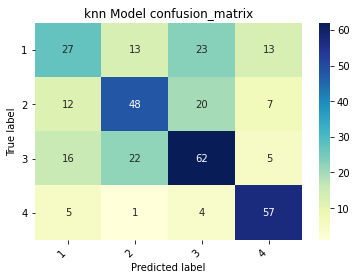

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('knn Model confusion_matrix')

plt.show()

In [ ]:
print(classification_report(y_test, yhat, target_names=['1','2','3','4']))
#F1 = 2 * (precision * recall) / (precision + recall)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

              precision    recall  f1-score   support

           1       0.45      0.36      0.40        76
           2       0.57      0.55      0.56        87
           3       0.57      0.59      0.58       105
           4       0.70      0.85      0.77        67

    accuracy                           0.58       335
   macro avg       0.57      0.59      0.58       335
weighted avg       0.57      0.58      0.57       335



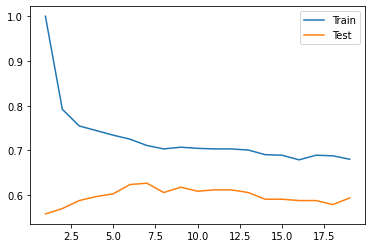

In [ ]:
# evaluate knn performance on train and test sets with different numbers of neighbors

# create dataset
# X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# # split into train test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights= 'uniform')
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
#     print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores,label='Train')
pyplot.plot(values, test_scores, label='Test')
pyplot.legend()
pyplot.show()

## Desision Tree

In [ ]:
#https://towardsdatascience.com/how-to-tune-a-decision-tree-f0372180168

show defult hyper parameter work

In [ ]:
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

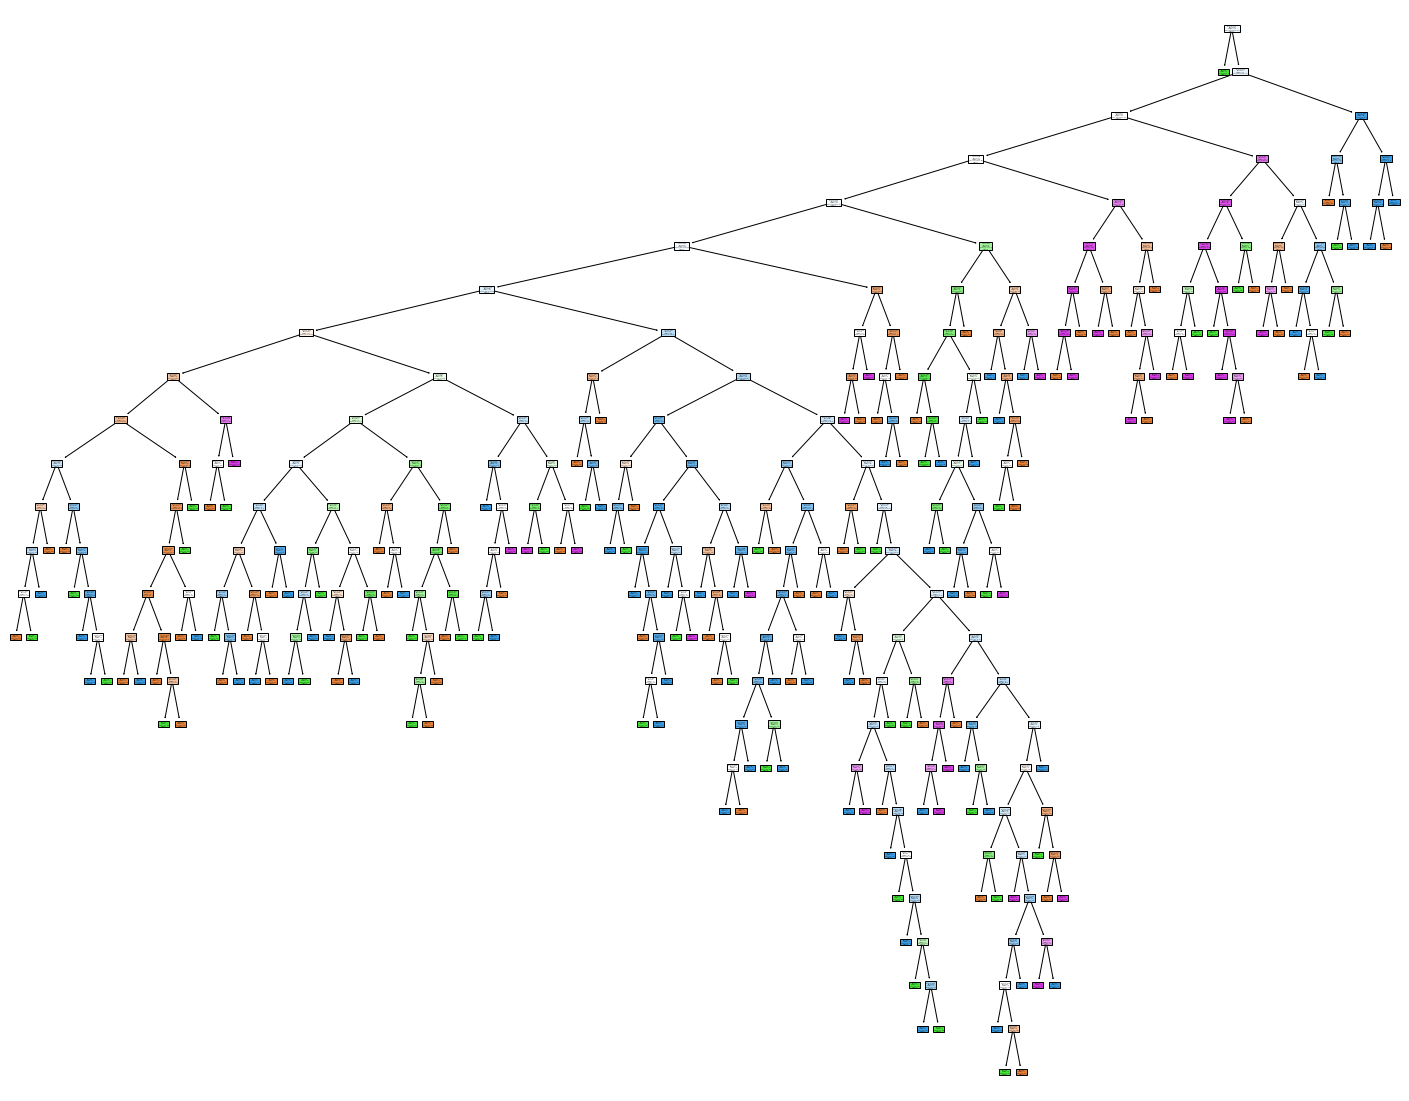

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisionTree_model,
                   feature_names= ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'],
                   class_names=['1','2','3','4'],
                   filled=True)

In [ ]:
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, decisionTree_model.predict(X_test)))
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, decisionTree_model.predict(X_train)))

Test set Accuracy:  0.6205585534861343
Train set Accuracy:  1.0


as shown above defaulte hyper parameter is over fitted

### tuninig hyper parameter by Gridsearch cross validarion

In [ ]:
decision_tree = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=10)

criterion = ['gini', 'entropy']
max_depth = [6,7,8,9,10,11,12,13,14,15]
max_features = ['sqrt', 'log2' , 0.90]


hp_candidates = [{'criterion': criterion, 'max_depth' : max_depth ,'max_features' :max_features}]

grid = GridSearchCV(estimator=decision_tree, param_grid=hp_candidates, cv=skfold)
g_res = grid.fit(X_train, y_train)


In [ ]:
print( "best score :" , g_res.best_score_)
print("best prams :" , g_res.best_params_)

best score : 0.6277056277056278
best prams : {'criterion': 'gini', 'max_depth': 9, 'max_features': 0.9}


In [ ]:
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, g_res.predict(X_test)))
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, g_res.predict(X_train)))

Test set Accuracy:  0.5834559378373881
Train set Accuracy:  0.7741886370632568


again diffrence of train and test accuracy is hight
and change some hyper parameter, like when spliter is best we complicate our model and it lead to overfitting again
again change some hyper parameter and evaluate accuracy

In [ ]:
decision_tree = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=10)

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [6,7,8,9,10,11,12,13,14,15]
max_features = ['sqrt', 'log2']

hp_candidates2 = [{'criterion': criterion, 'splitter': splitter , 'max_depth' : max_depth ,'max_features' :max_features}]

grid2 = GridSearchCV(estimator=decision_tree, param_grid=hp_candidates2, cv=skfold)
g_res2 = grid2.fit(X_train, y_train)

In [ ]:
print( "best score :" , g_res2.best_score_)
print("best prams :" , g_res2.best_params_)

best score : 0.6046786546786548
best prams : {'criterion': 'gini', 'max_depth': 13, 'max_features': 'log2', 'splitter': 'best'}


In [ ]:
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, g_res2.predict(X_test)))
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, g_res2.predict(X_train)))

Test set Accuracy:  0.590751244426042
Train set Accuracy:  0.9462737761816046


In [ ]:
decision_tree = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=10)

criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,9]
max_features = ['sqrt', 'log2' ]

hp_candidates3 = [{'criterion': criterion, 'max_depth' : max_depth ,'max_features' :max_features}]

grid3 = GridSearchCV(estimator=decision_tree, param_grid=hp_candidates3, cv=skfold)
g_res3 = grid3.fit(X_train, y_train)

In [ ]:
print( "best score :" , g_res3.best_score_)
print("best prams :" , g_res3.best_params_)

best score : 0.602147852147852
best prams : {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}


In [ ]:
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, g_res3.predict(X_test)) )
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, g_res3.predict(X_train)))

Test set Accuracy:  0.6013096560237443
Train set Accuracy:  0.7145619069063296


In [ ]:
decision_tree = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=10)

criterion = ['gini', 'entropy']
splitter = [ 'random']
max_depth = [6,7,8,9,10]
max_features = ['sqrt', 'log2' ]

hp_candidates4 = [{'criterion': criterion, 'splitter': splitter , 'max_depth' : max_depth ,'max_features' :max_features}]

grid4 = GridSearchCV(estimator=decision_tree, param_grid=hp_candidates4, cv=skfold)
g_res4 = grid4.fit(X_train, y_train)


In [ ]:
print( "best score :" , g_res4.best_score_)
print("best prams :" , g_res4.best_params_)
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, g_res4.predict(X_test)))
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, g_res4.predict(X_train)))

best score : 0.5288877788877788
best prams : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'random'}
Test set Accuracy:  0.5008780959088405
Train set Accuracy:  0.5314113664980463


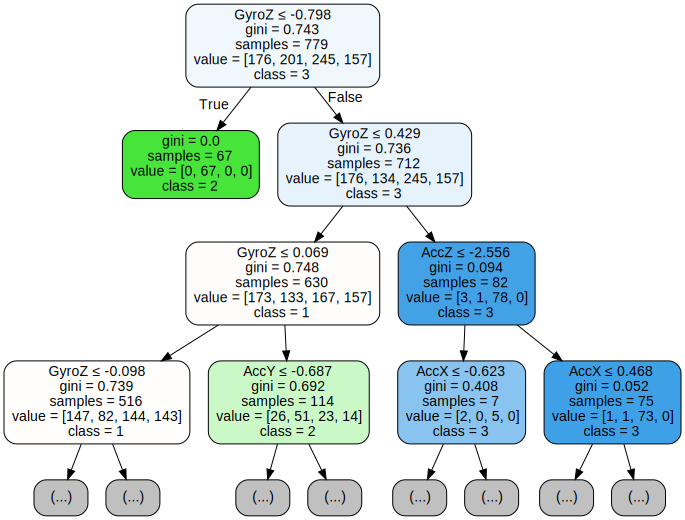

In [ ]:
import graphviz
from sklearn import tree
dt = DecisionTreeClassifier(criterion ='gini' , max_depth = 9, max_features = 'log2' ).fit(X_train , y_train)
dot_data = tree.export_graphviz(dt, out_file=None,
                     feature_names=['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'],
                     class_names=['1','2','3','4'],
                     filled=True, rounded=True,
                     special_characters=True ,   max_depth = 3)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#پارامتر هایی که داره و تعریف کن همین

accuracies_entropy = []
accuracies_gini = []
acc_train = []
cross_validation_fold = 10
depths = range(1,15)
for d in depths:

    decisionTree_model1 = DecisionTreeClassifier(criterion= 'entropy' , max_depth = d)
    decisionTree_model2 = DecisionTreeClassifier(criterion= 'gini' , max_depth = d )

    scores1= cross_validate(decisionTree_model1, X_train, y_train, cv=cross_validation_fold )
    scores2= cross_validate(decisionTree_model2, X_train, y_train, cv=cross_validation_fold )

    accuracies_entropy.append(scores1['test_score'].mean())
    accuracies_gini.append(scores2['test_score'].mean())
# print(accuracies)
# print(acc_train)
# print(max(accuracies))

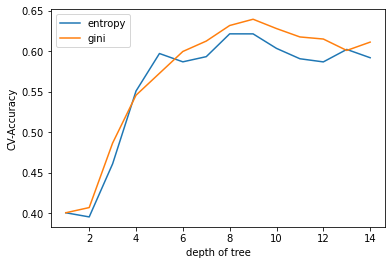

In [ ]:
fig2 = plt.figure()
plt.plot(depths, accuracies_entropy, label ="entropy")
plt.plot(depths, accuracies_gini, label='gini')
plt.xlabel('depth of tree')
plt.ylabel('CV-Accuracy')

plt.legend()

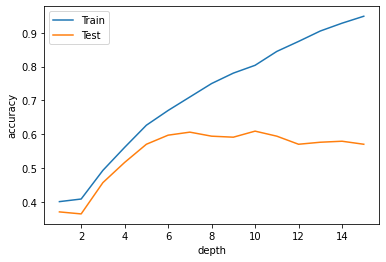

<Figure size 288x288 with 0 Axes>

In [ ]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
depths = [i for i in range(1, 16)]
# evaluate a decision tree for each depth
for d in depths:
    # configure the model
    decisionTree_model1 = DecisionTreeClassifier(criterion= 'gini' , max_depth = d )
    # fit model on the training dataset
    decisionTree_model1.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = decisionTree_model1.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = decisionTree_model1.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

pyplot.plot(depths, train_scores,label='Train')
pyplot.plot(depths, test_scores, label='Test')
pyplot.xlabel('depth')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.figure(figsize=(4,4))
pyplot.show()



In [ ]:

conmat = confusion_matrix(y_test, g_res3.predict(X_test))
val = np.mat(conmat)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

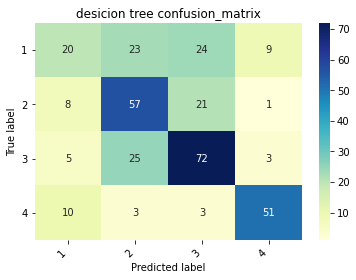

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('desicion tree confusion_matrix')

plt.show()

In [ ]:


print(classification_report(y_test, g_res3.predict(X_test), target_names=['1','2','3','4']))

              precision    recall  f1-score   support

           1       0.47      0.26      0.34        76
           2       0.53      0.66      0.58        87
           3       0.60      0.69      0.64       105
           4       0.80      0.76      0.78        67

    accuracy                           0.60       335
   macro avg       0.60      0.59      0.58       335
weighted avg       0.59      0.60      0.58       335



## svm

In [ ]:
from sklearn import svm


In [ ]:
svmm = svm.SVC()
skfold = StratifiedKFold(n_splits=10)
kernel =['linear', 'poly', 'rbf']
c = [0.001, 0.1, 1, 2]
hyperprameter_candidates = [{'kernel': kernel , 'C': c}]


In [ ]:
grid5 = GridSearchCV(estimator=svmm, param_grid=hyperprameter_candidates, cv=skfold)
g_res5 = grid5.fit(X_train, y_train)


In [ ]:
print( "best accuracy :" , g_res5.best_score_)
print("best prameter :" , g_res5.best_params_)

best accuracy : 0.6135364635364635
best prameter : {'C': 2, 'kernel': 'rbf'}


In [ ]:
print("Test set Accuracy: ", metrics.balanced_accuracy_score(y_test, g_res5.predict(X_test)) )
print("Train set Accuracy: ", metrics.balanced_accuracy_score(y_train, g_res5.predict(X_train)))

Test set Accuracy:  0.5928922441203368
Train set Accuracy:  0.6812171988617587


No handles with labels found to put in legend.


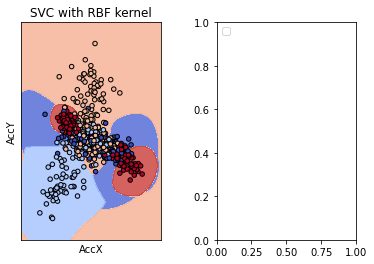

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train[:, 3:5]
y = y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (

    svm.SVC(kernel="rbf", gamma=0.7, C=C),

)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with RBF kernel",

)
feature_names= ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots( 1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(feature_names[3])
    ax.set_ylabel(feature_names[4])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.legend(loc='upper left')
plt.show()



[0.3145021645021645, 0.3145021645021645, 0.5211122211122211, 0.6123043623043622, 0.6135364635364635, 0.6328338328338329, 0.6379786879786881]
0.6379786879786881
[0.001, 0.01, 0.1, 1, 2, 5, 10]


Text(0.5, 1.0, ' kernel = rbf')

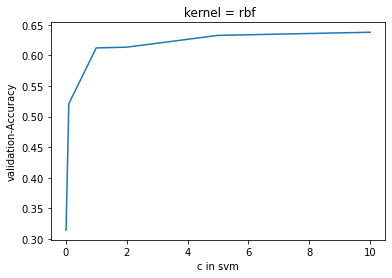

In [ ]:
accuracies = []
cross_validation_fold = 10
cs = [0.001, 0.01, 0.1 , 1 ,2,5,10]
for c1 in cs:
    s = svm.SVC(kernel='rbf' , C = c1)
    scores = cross_val_score(s, X_train, y_train, cv=cross_validation_fold)
    accuracies.append(scores.mean())
print(accuracies)
print(max(accuracies))

print(cs)
fig2 = plt.figure()
plt.plot(cs, accuracies)
plt.xlabel('c in svm')
plt.ylabel('validation-Accuracy')
plt.title(' kernel = rbf')

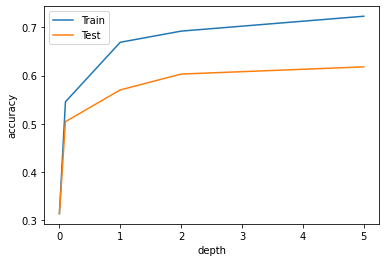

<Figure size 288x288 with 0 Axes>

In [ ]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
depths = [0.001, 0.1,1,2,5]
# evaluate a decision tree for each depth
for d in depths:
    # configure the model
    decisionTree_model1 = svm.SVC(kernel='rbf' , C = d)
    # fit model on the training dataset
    decisionTree_model1.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = decisionTree_model1.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = decisionTree_model1.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

pyplot.plot(depths, train_scores,label='Train')
pyplot.plot(depths, test_scores, label='Test')
pyplot.xlabel('depth')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.figure(figsize=(4,4))
pyplot.show()


In [ ]:
conmat = confusion_matrix(y_test, g_res5.predict(X_test))
val = np.mat(conmat)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)
print(df_cm)

    1   2   3   4
1  31   6  35   4
2   9  33  43   2
3   8   8  88   1
4  11   2   4  50


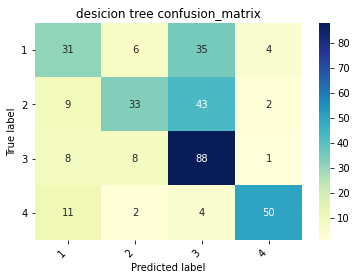

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()

In [ ]:
print(classification_report(y_test, g_res5.predict(X_test), target_names=['1','2','3','4']))

              precision    recall  f1-score   support

           1       0.53      0.41      0.46        76
           2       0.67      0.38      0.49        87
           3       0.52      0.84      0.64       105
           4       0.88      0.75      0.81        67

    accuracy                           0.60       335
   macro avg       0.65      0.59      0.60       335
weighted avg       0.63      0.60      0.59       335

